# Statistical Methods Assignment - Theodor Helje

## Introduction

*Skriv intro och presentera multilinjär regressionsanalys av huspriser i kali*

# Metod

Import libraries, the linear regression class and read the data

In [23]:
import pandas as pd
import seaborn as sns
from linear_regression_class import LinearRegression
df = pd.read_csv("housing.csv")

### Exploratory data analysis

To start building an understanding of the dataset I use df.head() to see how the data generally looks.

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Since i plan on using median_house_value as my response variable the first step is to make sure that it at least resembles a normal distribution somewhat. To do this I will use a hist plot

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

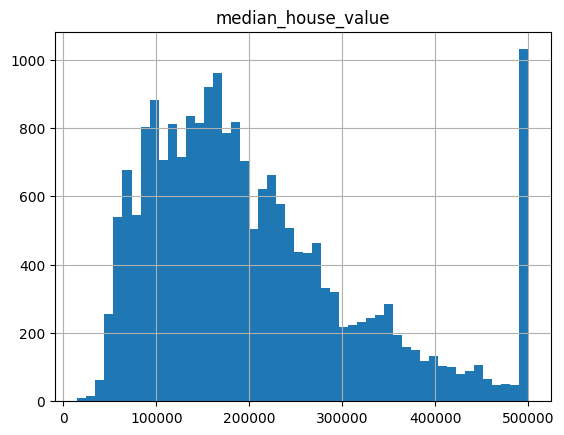

In [25]:
df[['median_house_value']].hist(bins=50)

This distribution looks somewhat normally distributed but with a heavy right skew. It also seems that 500000 is a maximum cap.

In [26]:
df[['median_house_value']].describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


The house values are capped at 500001 which will effect the regression, but since this assignment aims to take a statistical approach rather than a machine lerning approach I will not manipulate the data in any way. This desicion is supported by the fact that the goal of the regression isn't to predict unknown data, but rather say something about the existing data.

To get an overview of all of the possible parameters I could use to determine housing prices I will first use a pearson correlation heatmap to detect linearity between parameters. Here, coordinates, the response variable and categorical data are removed.

<Axes: >

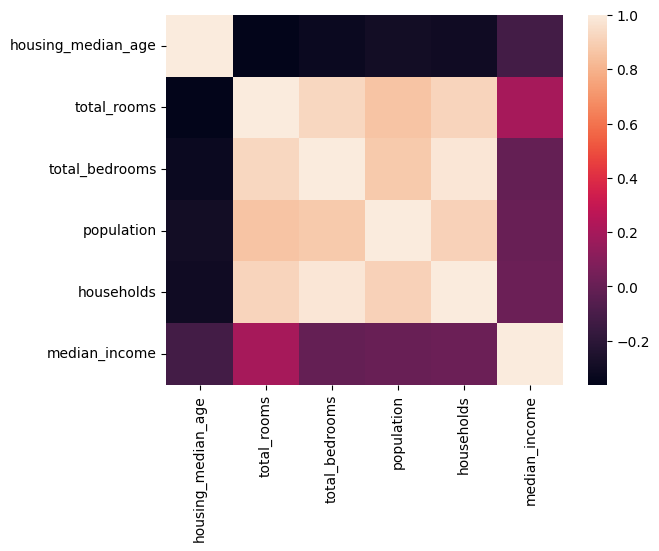

In [27]:
sns.heatmap(df.drop(['longitude', 'latitude', 'ocean_proximity', 'median_house_value'], axis=1).corr())

This heatmap clearly shows a strong colinearity between rooms, bedrooms, population and households. Therefore using more then one of them might lead to unstable results

<Axes: >

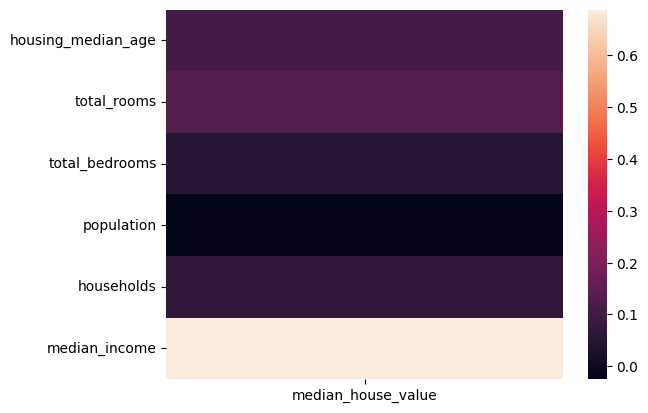

In [28]:
sns.heatmap(
    df.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1)
    .corr()[['median_house_value']]
    .drop('median_house_value')
)

This correlation heatmap shows the possible features pearson correlation with the response variable. Here we can clearly see that median income probably is a good predictor of house value.

A multilinear regression handles multiple features, therefore it would be resonable to choose a few of these as predictors. Since rooms, bedrooms, population and household are all colinear only one of them should be included in the regression, only rooms will be added since that has the highest correlation.

This means that my primary choise for predictors will be housing_median_age, total_rooms, median_income and ocean_proximity (since ocean proximity undoubteby effects housing prices).